In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter, freqz

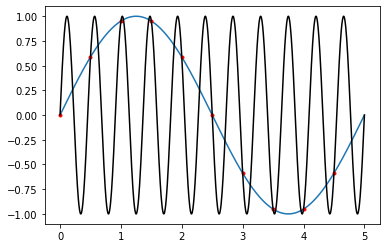

In [44]:
a = 0
b = 5
T = 5
f = 1/T
N = 1000
t = np.linspace(a, b, 1000)
g = lambda t: np.sin(2*np.pi*f*t)
h = lambda t: np.sin(2*np.pi*(f+f_s)*t)
x = g(t)
f_s = 10/T
T_s = 1/f_s
t_s = np.arange(a, b, T_s)
x_s = h(t_s)
plt.plot(t, x)
plt.plot(t_s, x_s, 'r.')
plt.plot(t, h(t), 'k')

In [45]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


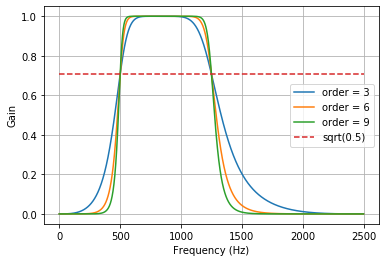

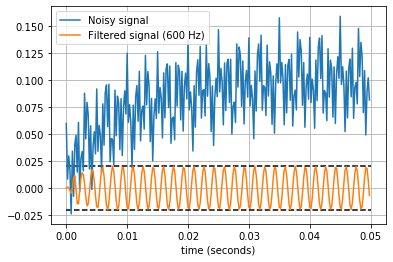

In [46]:
fs = 5000.0
lowcut = 500.0
highcut = 1250.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

# Filter a noisy signal.
T = 0.05
nsamples = T * fs
t = np.linspace(0, T, nsamples, endpoint=False)
a = 0.02
f0 = 600.0
x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
x += a * np.cos(2 * np.pi * f0 * t + .11)
x += 0.03 * np.cos(2 * np.pi * 2000 * t)
plt.figure(2)
plt.clf()
plt.plot(t, x, label='Noisy signal')

y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
plt.plot(t, y, label='Filtered signal (%g Hz)' % f0)
plt.xlabel('time (seconds)')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

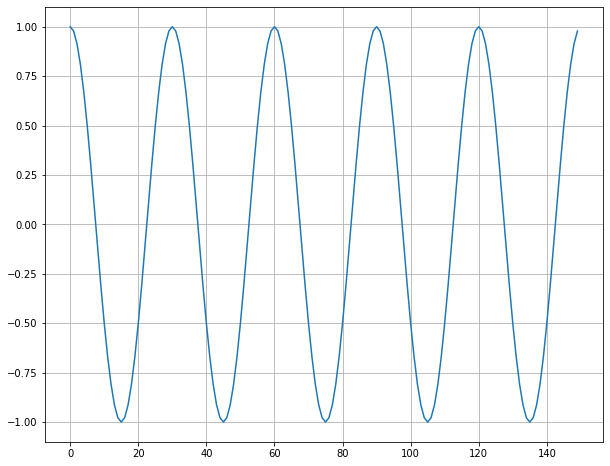

In [226]:
# Time period for bi-monthly occurance
T = 60 
f_max = 1 # something can change daily
fs = 10 * f_max
n_T = 15 # number of periods
N = n_T * fs
f0 = 2
f = f0 /T
w = 2*np.pi*f
dates = pd.date_range('2000', freq='D', periods=N)
n = np.arange(0, N, 1)
monthly_spike = np.exp(-30*np.sin(w*n+np.pi/2)**2)
monthly_spike = np.sin(w*n+np.pi/2)
plt.figure(figsize=(10, 8))
plt.plot(n, monthly_spike, '-')
plt.grid(True)
plt.show()

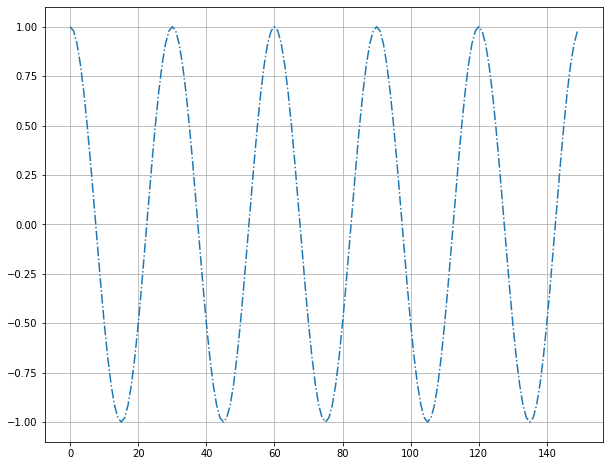

In [227]:
ts = 0.01 * n * 0 + 0*np.cumsum(.05 * np.random.randn(len(n))) + monthly_spike
plt.figure(figsize=(10, 8))
plt.plot(n, ts, '-.')
plt.grid(True)
plt.show()

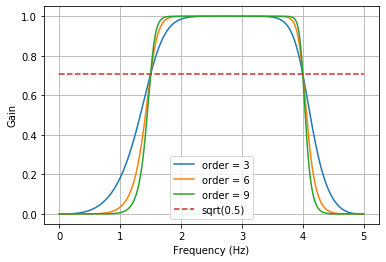

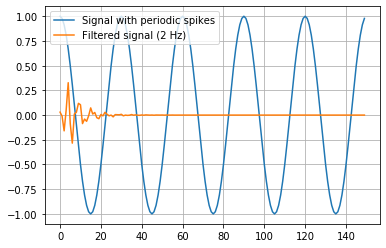

In [231]:
lowcut = f0-.5
highcut = f0+2

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
         '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.figure(2)
plt.clf()
plt.plot(n, ts, label='Signal with periodic spikes')
y = butter_bandpass_filter(ts, lowcut, highcut, fs, order=6)
plt.plot(n, y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

In [230]:
f0

2